In [1]:
import libpysal as lps
import numpy as np
from giddy.directional import Rose

In [2]:
f = open(lps.examples.get_path('spi_download.csv'), 'r')
lines = f.readlines()
f.close()

In [3]:
lines = [line.strip().split(",") for line in lines]
names = [line[2] for line in lines[1:-5]]
data = np.array([map(int, line[3:]) for line in lines[1:-5]])


In [4]:
sids  = range(60)
out = ['"United States 3/"',
      '"Alaska 3/"',
      '"District of Columbia"',
      '"Hawaii 3/"',
      '"New England"','"Mideast"',
       '"Great Lakes"',
       '"Plains"',
       '"Southeast"',
       '"Southwest"',
       '"Rocky Mountain"',
       '"Far West 3/"']

In [5]:
out

['"United States 3/"',
 '"Alaska 3/"',
 '"District of Columbia"',
 '"Hawaii 3/"',
 '"New England"',
 '"Mideast"',
 '"Great Lakes"',
 '"Plains"',
 '"Southeast"',
 '"Southwest"',
 '"Rocky Mountain"',
 '"Far West 3/"']

In [6]:
snames = [name for name in names if name not in out]

In [7]:
sids = [names.index(name) for name in snames]

In [8]:
states = data[sids,:]
us = data[0]
years = np.arange(1969, 2009)

In [9]:
sids

[1,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51]

In [10]:
us

array([ 3836,  4084,  4340,  4717,  5230,  5708,  6172,  6754,  7402,
        8243,  9138, 10091, 11209, 11901, 12583, 13807, 14637, 15338,
       16137, 17244, 18402, 19354, 19818, 20799, 21385, 22297, 23262,
       24442, 25654, 27258, 28333, 30318, 31149, 31470, 32284, 33899,
       35447, 37728, 39430, 40208])

In [11]:
rel = states/(us*1.)

In [12]:
rel[0]

array([ 0.71272158,  0.72526934,  0.73870968,  0.74750901,  0.75391969,
        0.7596356 ,  0.77219702,  0.78664495,  0.78276142,  0.78418052,
        0.78124316,  0.77544346,  0.77250424,  0.76901101,  0.77660335,
        0.77873542,  0.78595341,  0.78758639,  0.78918015,  0.79094178,
        0.8029562 ,  0.80696497,  0.8243516 ,  0.83003991,  0.83076923,
        0.83670449,  0.84046944,  0.82828737,  0.82318547,  0.81506347,
        0.81039777,  0.7939178 ,  0.80570805,  0.82033683,  0.82867674,
        0.83793032,  0.84320253,  0.83449958,  0.83395891,  0.83983287])

In [13]:
rel[1]

array([ 0.91110532,  0.93756121,  0.95184332,  0.94827221,  0.9376673 ,
        0.92869657,  0.89679196,  0.89739414,  0.89367738,  0.913745  ,
        0.93116656,  0.93984739,  0.94406281,  0.91437694,  0.92426289,
        0.92728326,  0.93161167,  0.93460686,  0.92309599,  0.90367664,
        0.88474079,  0.86834763,  0.87057221,  0.85398336,  0.85906009,
        0.86939947,  0.86682143,  0.86568202,  0.86657052,  0.87027662,
        0.8676455 ,  0.8661851 ,  0.86477897,  0.86406101,  0.8629352 ,
        0.87220862,  0.89042796,  0.88788168,  0.87276186,  0.85393454])

In [14]:
rel.shape

(48, 40)

In [15]:
gal = lps.open(lps.examples.get_path('states48.gal'))
w = gal.read()
w.transform = 'r'

In [16]:
Y = rel[:, [0, -1]]

In [17]:
Y.shape

(48, 2)

In [18]:
Y.min(axis=0)

array([ 0.62643379,  0.75604357])

In [19]:
np.random.seed(100)

In [20]:
import giddy

In [21]:
obs = giddy.directional.Rose(Y, w)

In [22]:
obs.theta

array([ 0.53092059, -2.83786348,  0.57857754, -2.39029203,  0.50048609,
        0.49308822,  2.66265527,  1.31237337,  1.05239278,  2.8513037 ,
       -2.7474163 , -2.38187761,  2.30545873,  0.88940281,  0.04967279,
        0.60112389,  0.88633533,  0.21913933,  0.3910774 , -2.74925951,
        0.70340855,  0.77073198,  2.0648695 ,  1.55140966,  1.13252447,
       -2.83061746,  0.82580076, -0.34913611,  0.42289413,  1.3765752 ,
        0.8599736 ,  0.44198349, -2.79570375,  0.81964707, -2.23923212,
        0.60706132,  1.41295623,  0.70801561,  0.50125253,  0.71651346,
        1.02018159,  1.97531142,  0.91018966,  0.41323253, -1.54757312,
        0.5677245 , -2.15445399,  0.16995537])

In [23]:
obs.bins

array([ 0.        ,  0.78539816,  1.57079633,  2.35619449,  3.14159265,
        3.92699082,  4.71238898,  5.49778714,  6.28318531])

In [24]:
obs.counts

array([19, 13,  3,  2,  7,  2,  1,  1])

In [25]:
obs.r

array([ 0.14740252,  0.05991313,  0.14783647,  0.13144192,  0.12299364,
        0.16204859,  0.15871534,  0.08999664,  0.09466345,  0.02955006,
        0.08270615,  0.14042309,  0.03760711,  0.06149289,  0.02510278,
        0.18618054,  0.1402447 ,  0.11122349,  0.19874687,  0.22929051,
        0.11310828,  0.18066577,  0.04082242,  0.15024623,  0.10078157,
        0.16458795,  0.16026698,  0.11090189,  0.07700033,  0.10566026,
        0.13023491,  0.20325247,  0.1314716 ,  0.08751344,  0.08922562,
        0.00809764,  0.16529773,  0.10139345,  0.19571655,  0.13131092,
        0.11947302,  0.03803144,  0.13204236,  0.18762329,  0.04181733,
        0.07008608,  0.06806285,  0.27782787])

Populating the interactive namespace from numpy and matplotlib


/Users/serge/anaconda3/envs/pysal2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


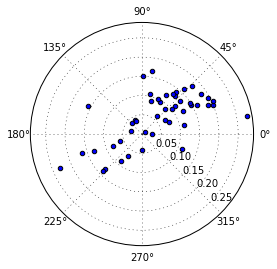

In [26]:
%pylab inline

obs.plot()

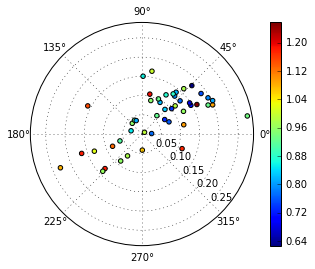

In [27]:
obs.plot(attribute=Y[:,0])

In [28]:
obs.counts

array([19, 13,  3,  2,  7,  2,  1,  1])

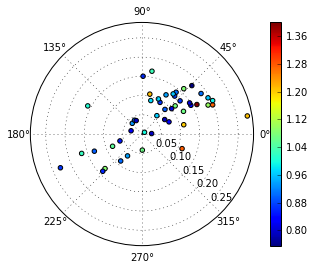

In [29]:
obs.plot(attribute=Y[:,1])

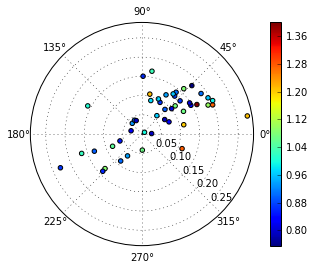

In [30]:
obs.plot(attribute=obs.Y[:,1])

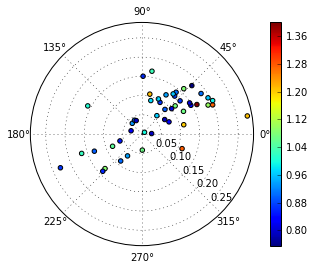

In [31]:
obs.plot(attribute=obs.Y[:,1])

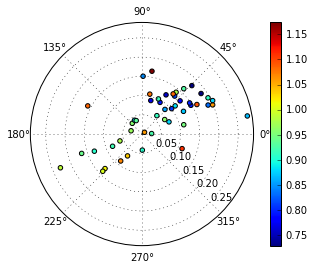

In [32]:
obs.plot(attribute=obs.lag[:,0])

In [33]:
obs.permute()

In [34]:
obs.counts_perm

array([[ 22.,   8.,   7.,   4.,   3.,   0.,   1.,   3.],
       [ 21.,   9.,   5.,   7.,   1.,   1.,   0.,   4.],
       [ 21.,   9.,   2.,   6.,   5.,   1.,   1.,   3.],
       [ 15.,  12.,   4.,   6.,   4.,   0.,   1.,   6.],
       [ 20.,   9.,   3.,   7.,   4.,   0.,   2.,   3.],
       [ 19.,  10.,   6.,   7.,   1.,   0.,   0.,   5.],
       [ 13.,  13.,   3.,   9.,   1.,   1.,   2.,   6.],
       [ 20.,  10.,   5.,   5.,   4.,   0.,   0.,   4.],
       [ 18.,   8.,   4.,   8.,   0.,   2.,   2.,   6.],
       [ 19.,   9.,   5.,   9.,   0.,   0.,   0.,   6.],
       [ 14.,  14.,   2.,   7.,   2.,   3.,   1.,   5.],
       [ 19.,   7.,   6.,   5.,   3.,   0.,   2.,   6.],
       [ 17.,  10.,   5.,   3.,   4.,   2.,   2.,   5.],
       [ 23.,   7.,   5.,   6.,   3.,   0.,   1.,   3.],
       [ 21.,   9.,   4.,  10.,   0.,   0.,   0.,   4.],
       [ 19.,  10.,   2.,   8.,   2.,   2.,   1.,   4.],
       [ 21.,   8.,   5.,   4.,   4.,   1.,   3.,   2.],
       [ 19.,   9.,   7.,   4.,

In [35]:
obs.counts

array([19, 13,  3,  2,  7,  2,  1,  1])

In [36]:
obs.larger_perm

array([46,  6, 91, 99,  0,  9, 79, 99])

In [37]:
P = (np.array(obs.larger_perm) + 1) / 100.

In [38]:
P

array([ 0.47,  0.07,  0.92,  1.  ,  0.01,  0.1 ,  0.8 ,  1.  ])

In [39]:
lt5 = P < 0.5

In [40]:
lt5

array([ True,  True, False, False,  True,  True, False, False], dtype=bool)

In [41]:
p = lt5 * 2 * P + (1-lt5) * 2 * (1-P)

In [42]:
p

array([ 0.94,  0.14,  0.16,  0.  ,  0.02,  0.2 ,  0.4 ,  0.  ])

In [43]:
obs.p

array([ 0.94,  0.14,  0.16,  0.  ,  0.02,  0.2 ,  0.4 ,  0.  ])

In [44]:
obs.larger_perm

array([46,  6, 91, 99,  0,  9, 79, 99])

In [45]:
obs.expected_perm

array([ 18.05050505,   9.37373737,   4.4040404 ,   7.        ,
         2.01010101,   0.58585859,   1.39393939,   5.18181818])

In [46]:
obs.counts

array([19, 13,  3,  2,  7,  2,  1,  1])

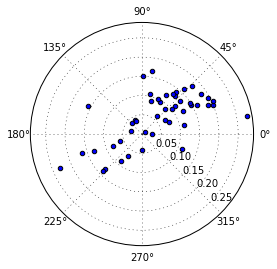

In [47]:
obs.plot()

In [48]:
x = np.array([-1, +1, +1, -1])
y = np.array([-1, -1, +1, +1])

In [49]:
np.arctan2(y, x)

array([-2.35619449, -0.78539816,  0.78539816,  2.35619449])

In [50]:
np.arctan2(y, x) * 180 / np.pi

array([-135.,  -45.,   45.,  135.])

In [51]:
signed = np.arctan2(y, x) * 180 / np.pi

In [52]:
signed

array([-135.,  -45.,   45.,  135.])

In [53]:
360+signed

array([ 225.,  315.,  405.,  495.])

In [54]:
neg = signed < 0

In [55]:
(neg) * (360+signed) + (1-neg) * signed

array([ 225.,  315.,   45.,  135.])

In [56]:
obs = giddy.directional.Rose(Y, w, k=4)

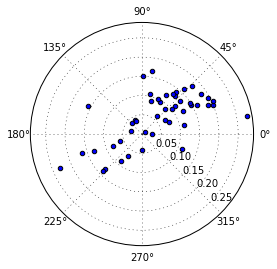

In [57]:
obs.plot()

In [58]:
obs.counts

array([32,  5,  9,  2])

In [59]:
obs.permute()

In [60]:
obs.p

array([ 0.06,  0.  ,  0.02,  0.02])

In [61]:
obs.expected_perm

array([ 27.55555556,  11.38383838,   2.61616162,   6.44444444])

In [62]:
obs.permute(alternative='two')

Bad option for alternative: two.


In [63]:
obs.permute(alternative='two.sided')

In [64]:
ks = range(8)

In [65]:
k=8

In [66]:
cut = k/4


In [67]:
cut

2

In [68]:
[ki%cut for ki in ks]

[0, 1, 0, 1, 0, 1, 0, 1]

In [69]:
pos = (1,0)

In [70]:
obs.p

array([ 0.06,  0.  ,  0.02,  0.02])

In [71]:
obs.permute(alternative='negative')
obs.p

array([ 1.,  1.,  1.,  1.])

In [72]:
obs.permute(alternative='negative')
obs.p

array([ 0.98,  1.  ,  1.  ,  0.98])

In [73]:
obs.permute(alternative='positive')
obs.p

array([ 0.01,  0.01,  0.01,  0.01])

In [74]:
obs.permute()

In [75]:
obs.p

array([ 0.06,  0.  ,  0.02,  0.  ])

In [76]:
obs = giddy.directional.Rose(Y, w, k=8)

In [77]:
np.random.seed(12345)
obs.permute(alternative='positive')
obs.p

array([ 0.45,  0.07,  0.31,  0.02,  0.01,  0.14,  0.68,  0.01])

In [78]:
np.random.seed(12345)
obs.permute(alternative='negative')
obs.p

array([ 0.7 ,  0.97,  0.93,  1.  ,  1.  ,  0.98,  0.69,  1.  ])

In [79]:
np.random.seed(12345)
obs.permute()
obs.p

array([ 0.92,  0.06,  0.12,  0.  ,  0.02,  0.2 ,  0.52,  0.  ])

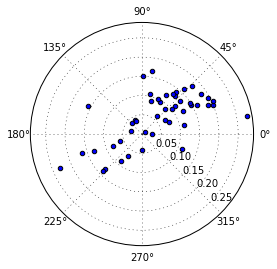

In [80]:
obs.plot()

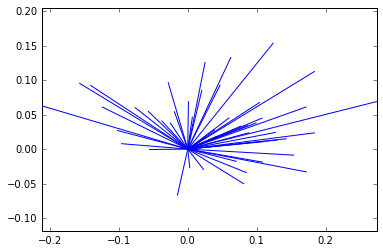

In [81]:
obs.plot_origin()

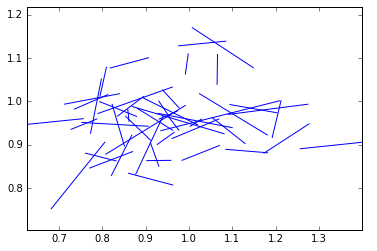

In [82]:
obs.plot_vectors()